# **<font color='MediumSeaGreen'>Week 3 - Machine Learning</font>**

*Notebook by: Shaafe Khan*

## **<font color='MediumSeaGreen'>Introduction</font>**
In this notebook, we attempt to predict the attrition of an employee based on various variables out of the IBM dataset.

In [104]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

df = pd.read_csv('attrition.csv')
df.head()




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [105]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## **<font color='MediumSeaGreen'>Data Cleaning</font>**

In this section, the dataset is cleaned.

In [106]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

Attrition classification is converted to numerical values so that it can be processed by the K-nearest neighbor algorithm.

In [107]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We can see that a few columns contain either values that have a single unique value, or only unique values.

In [108]:
# df2 = df[['meanfreq', 'median', 'label', 'mode']]
# sns.pairplot(data=df2, hue='label')


df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)


Dropping columns for having a single unique value or only unique values.

## **<font color='MediumSeaGreen'>Exploratory data analysis</font>**


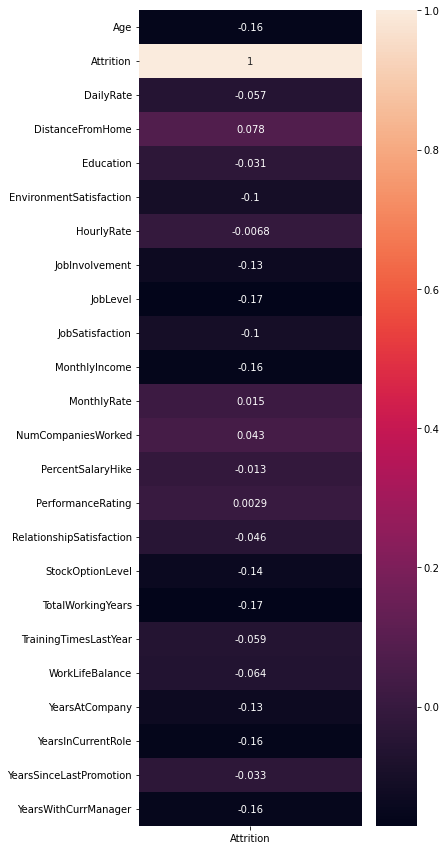

In [109]:
dfCorr = df.corr()[['Attrition']]
plt.figure(figsize = (5,15))
sns.heatmap(data=dfCorr, annot=True, )
plt.show()

Top 4 highest correlating variables:

- DistanceFromHome

- NumCompaniesWorked

- MonthlyRate

- PerformanceRate

## **<font color='MediumSeaGreen'>Predictive model</font>**


## **<font color='MediumSeaGreen'>Predictive Model (K-nearest neighbors)</font>**

Below, will attempt to predict Attrition using the variables picked out during the correlation analysis.

In [131]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df[['DistanceFromHome', 'MonthlyRate', 'NumCompaniesWorked']]
y = df['Attrition'] #create the y-variable
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [132]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=7) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.8208616780045351

### **<font color='MediumSeaGreen'>What is K-nearest neighbors (KNN)?</font>**

KNN is a machine learning algorithm that is used for regression and classification tasks. Supervised machine learning algorithms generate predictions using labelled data, thus the data inputted is already classified. The KNN algorithm generates predictions based on distance between pre-existing datapoints that are labelled. 

## **<font color='MediumSeaGreen'>Conclusion</font>**


Baseline guess 1233 / (1233 + 237) = 83.8%

Predictive model = 82%

**The predictive model is performing as good as the baseline guess.**